<a href="https://colab.research.google.com/github/Bgisemba/Loanprediction/blob/main/Loan_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [ ]:
#loading the datasets
df=pd.read_csv('train_ctrUa4K.csv')
test=pd.read_csv('test_lAUu6dG.csv')

In [ ]:
pip show scikit-learn

Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS 

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
#no of records
df.shape

(614, 13)

In [ ]:
test.shape

(367, 12)

In [ ]:
#statistical measures
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#number of missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Show the columns with their corresponding missing values percentage
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


In [ ]:
#drop the missing values since their is a low percentage
df=df.dropna()

In [ ]:
df.isnull().sum()
# Find the actual unique values for all columns

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Select only categorical (object) columns, excluding the 'ID' column
categorical_columns = df.select_dtypes(include=['object']).drop(columns=['Loan_ID'], errors='ignore')

# Find the actual unique values for categorical columns
print("Unique values for each categorical column (excluding ID):")
for column in categorical_columns.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

Unique values for each categorical column (excluding ID):
Gender: ['Male' 'Female']
Married: ['Yes' 'No']
Dependents: ['1' '0' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Rural' 'Urban' 'Semiurban']
Loan_Status: ['N' 'Y']


In [ ]:
#lable encoding the target variable
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


### Explanatory Data Analysis

<Axes: xlabel='Education', ylabel='count'>

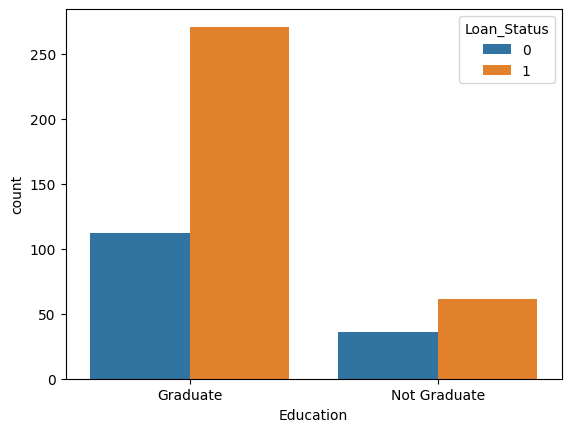

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

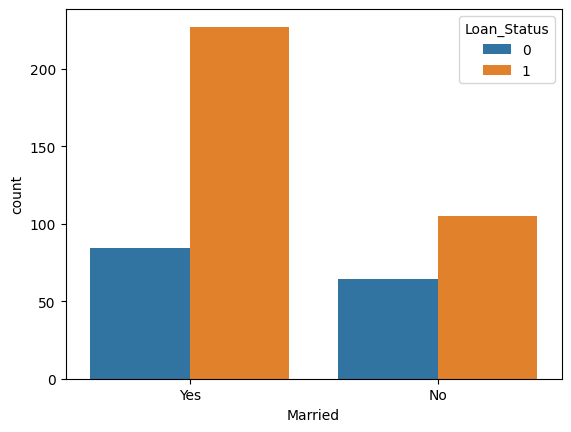

In [ ]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

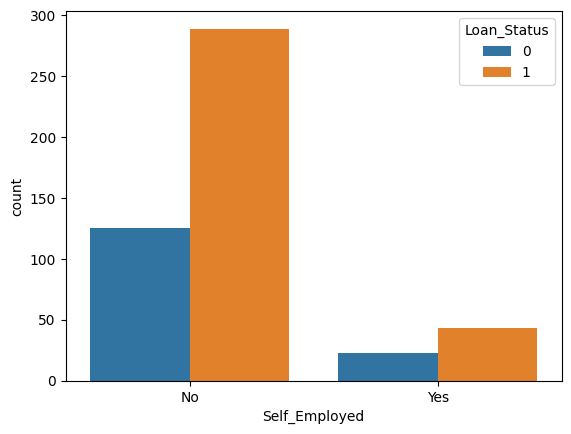

In [ ]:
# Employment Status & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

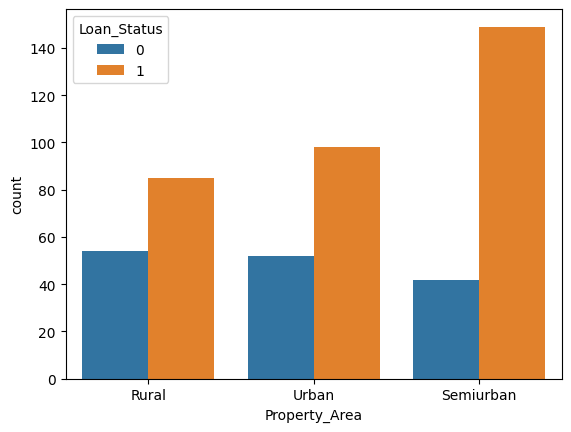

In [ ]:
#proprty area vs loan status
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<Axes: xlabel='Dependents', ylabel='count'>

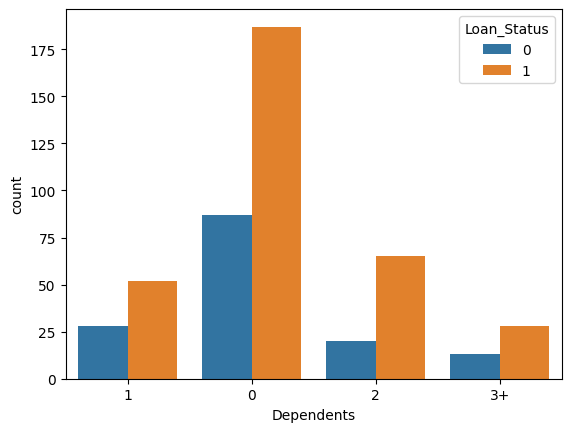

In [ ]:
#No of Dependents vs Loan Status
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

## Modelling

In [ ]:
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# separating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [ ]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
from sklearn.model_selection import train_test_split
#train test split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

## SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Scale the data (SVM works better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        30
           1       0.82      0.97      0.89        66

    accuracy                           0.83        96
   macro avg       0.85      0.75      0.78        96
weighted avg       0.84      0.83      0.82        96


Confusion Matrix:
 [[16 14]
 [ 2 64]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only applicable if kernel='poly'
}

# Initialize the SVM model
svm = SVC()

# Set up GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation score for SVM:", grid_search_svm.best_score_)

Best parameters for SVM: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score for SVM: 0.8020164046479836


In [ ]:
#applying hyper parameter tuning
# Initialize and train the SVM model
svm_model_best = SVC(C=0.1,kernel='linear',gamma='scale',degree=2, random_state=42)
svm_model_best.fit(X_train, y_train)

# Make predictions
y_pred = svm_model_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        30
           1       0.82      0.97      0.89        66

    accuracy                           0.83        96
   macro avg       0.85      0.75      0.78        96
weighted avg       0.84      0.83      0.82        96


Confusion Matrix:
 [[16 14]
 [ 2 64]]


In [ ]:
#pred=svm_model.predict(test)
#test_acc=accuracy_score(y_test,pred)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.57      0.68        30
           1       0.83      0.95      0.89        66

    accuracy                           0.83        96
   macro avg       0.84      0.76      0.78        96
weighted avg       0.84      0.83      0.82        96


Confusion Matrix:
 [[17 13]
 [ 3 63]]


In [ ]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l1', 'l2'],  # 'l1' only works with 'liblinear'
    'max_iter': [100, 200, 300]
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Set up GridSearchCV
grid_search_lr = GridSearchCV(estimator=log_reg, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score for Logistic Regression: 0.8020164046479836


In [ ]:
# Initialize and train the Logistic Regression model with the best parameters
log_reg_best = LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver='liblinear')
log_reg_best.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        30
           1       0.82      0.97      0.89        66

    accuracy                           0.83        96
   macro avg       0.85      0.75      0.78        96
weighted avg       0.84      0.83      0.82        96


Confusion Matrix:
 [[16 14]
 [ 2 64]]


In [ ]:
#pred=log_reg_model.model.predict(test)
#test_acc=accuracy_score(y_test,pred)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Scale the data (optional for Decision Tree, but can help with some features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7395833333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.70      0.63        30
           1       0.85      0.76      0.80        66

    accuracy                           0.74        96
   macro avg       0.71      0.73      0.71        96
weighted avg       0.76      0.74      0.75        96


Confusion Matrix:
 [[21  9]
 [16 50]]


In [ ]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier()

# Set up GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation score for Decision Tree: 0.7342447026657553


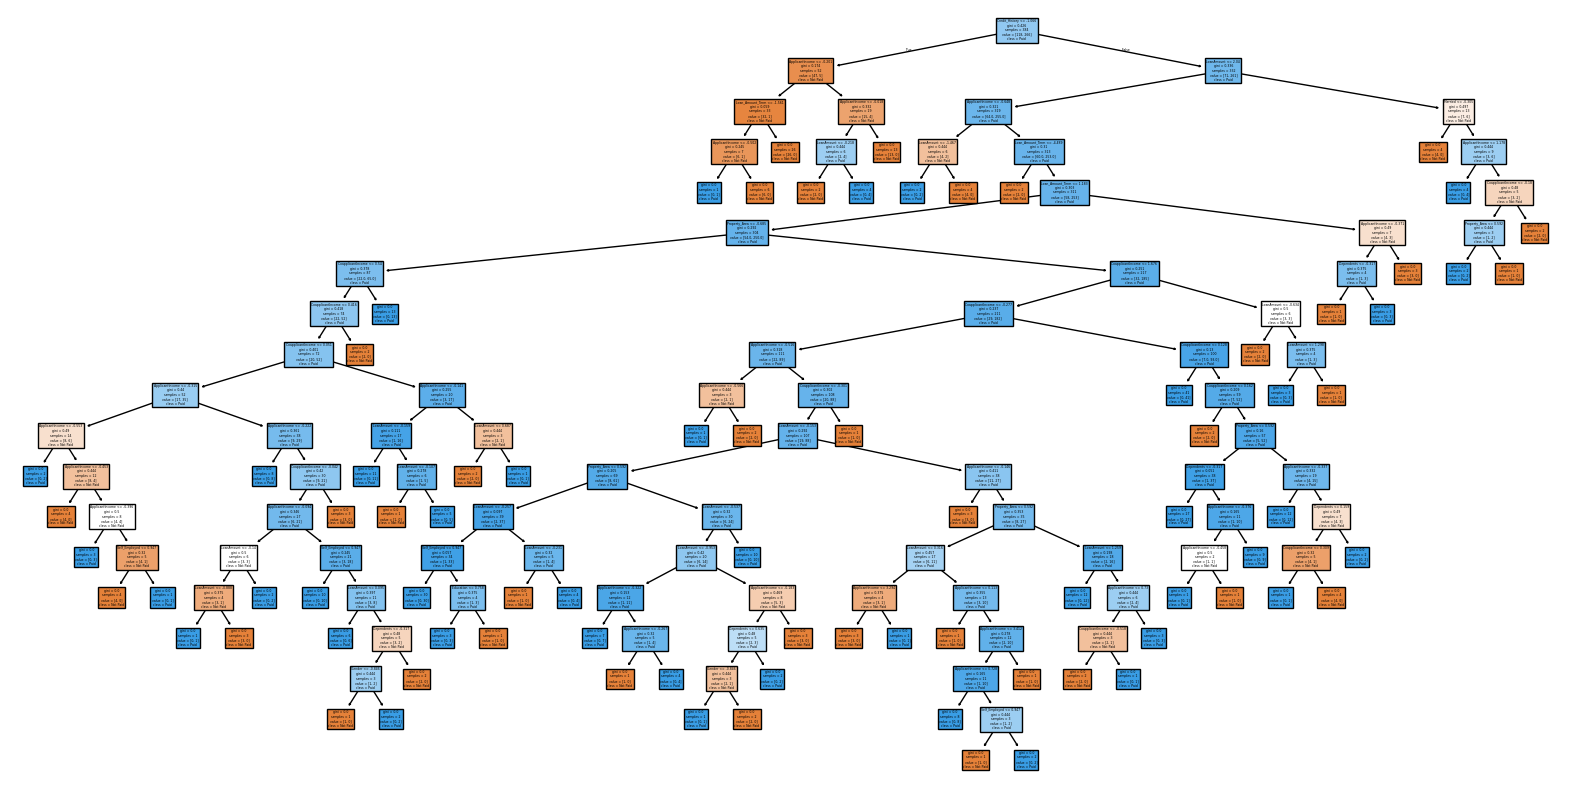

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Not Paid', 'Paid'])
plt.show()

In [ ]:
# Initialize and train the Decision Tree model with the best parameters
decision_tree_best = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5
)
decision_tree_best.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6979166666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.67      0.58        30
           1       0.82      0.71      0.76        66

    accuracy                           0.70        96
   macro avg       0.67      0.69      0.67        96
weighted avg       0.73      0.70      0.71        96


Confusion Matrix:
 [[20 10]
 [19 47]]


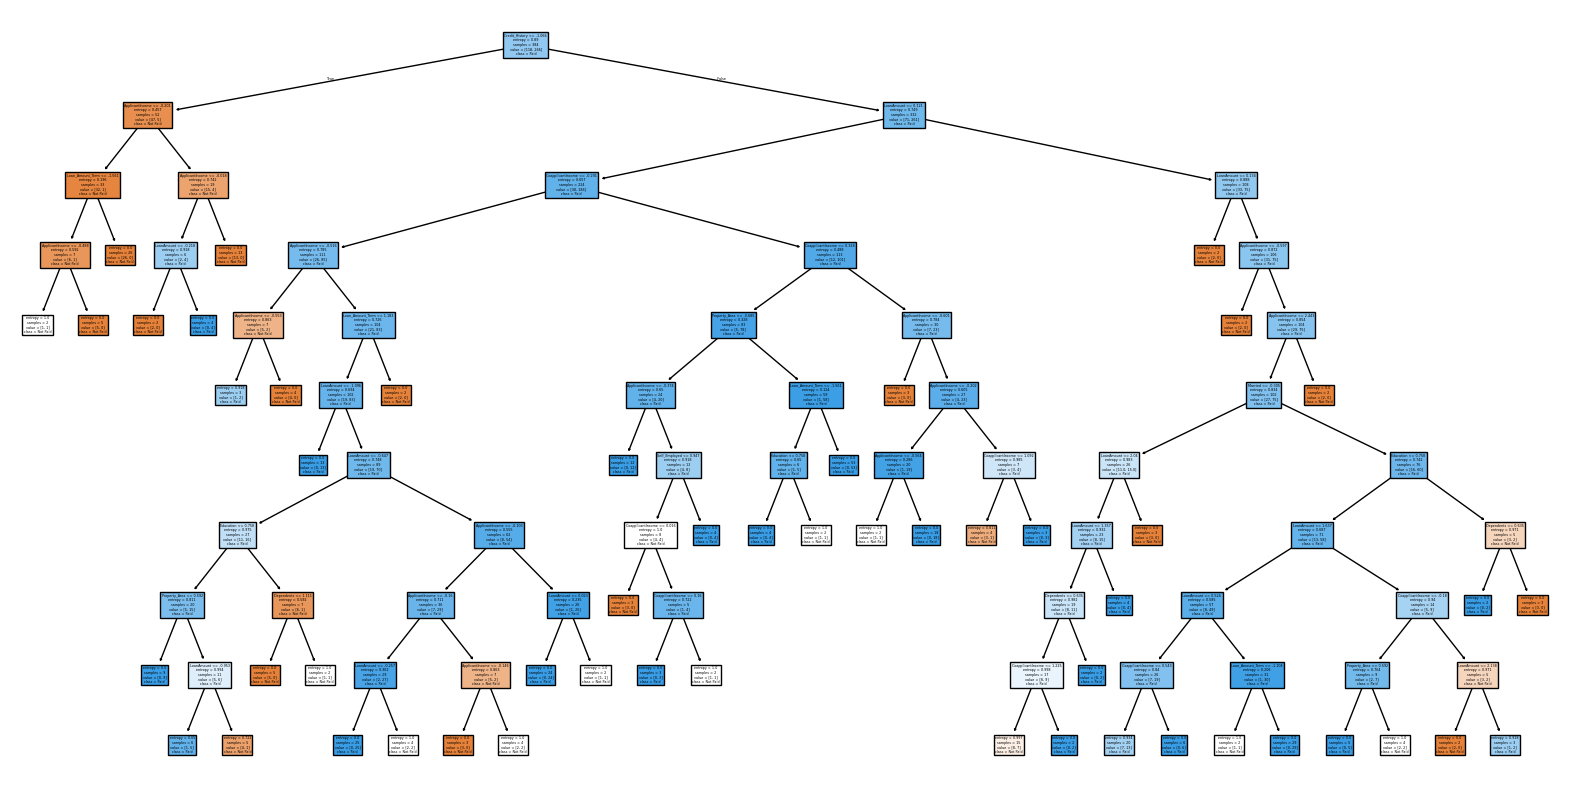

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(decision_tree_best, filled=True, feature_names=X.columns, class_names=['Not Paid', 'Paid'])
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8125

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.67      0.69        30
           1       0.85      0.88      0.87        66

    accuracy                           0.81        96
   macro avg       0.78      0.77      0.78        96
weighted avg       0.81      0.81      0.81        96


Confusion Matrix:
 [[20 10]
 [ 8 58]]


In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

              Feature  Importance
9      Credit_History    0.231026
5     ApplicantIncome    0.212314
7          LoanAmount    0.197646
6   CoapplicantIncome    0.107248
10      Property_Area    0.054507
2          Dependents    0.052283
8    Loan_Amount_Term    0.050329
1             Married    0.030570
0              Gender    0.022675
3           Education    0.021480
4       Self_Employed    0.019922


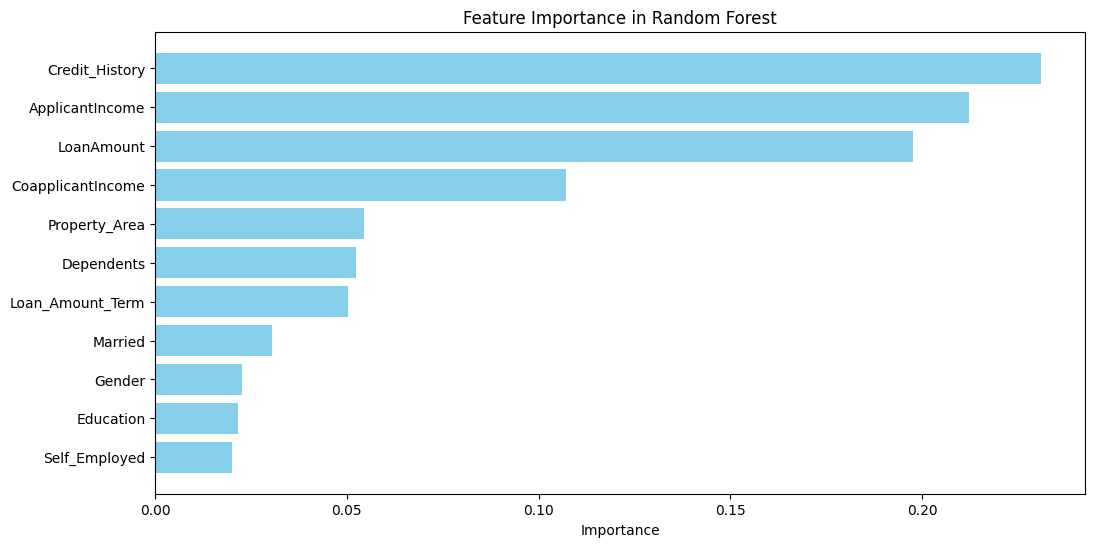

In [ ]:
# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation score for Random Forest: 0.8046138072453861


In [ ]:
# Initialize and train the Random Forest model with the best parameters
random_forest_best = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=200,
    random_state=42  # Ensures reproducibility
)
random_forest_best.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.84375

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.57      0.69        30
           1       0.83      0.97      0.90        66

    accuracy                           0.84        96
   macro avg       0.86      0.77      0.79        96
weighted avg       0.85      0.84      0.83        96


Confusion Matrix:
 [[17 13]
 [ 2 64]]


In [ ]:
# Get feature importances
importances = random_forest_best.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

              Feature  Importance
9      Credit_History    0.401345
7          LoanAmount    0.159398
5     ApplicantIncome    0.157714
6   CoapplicantIncome    0.096293
10      Property_Area    0.055363
1             Married    0.036668
2          Dependents    0.028710
8    Loan_Amount_Term    0.026779
3           Education    0.016759
0              Gender    0.011213
4       Self_Employed    0.009760


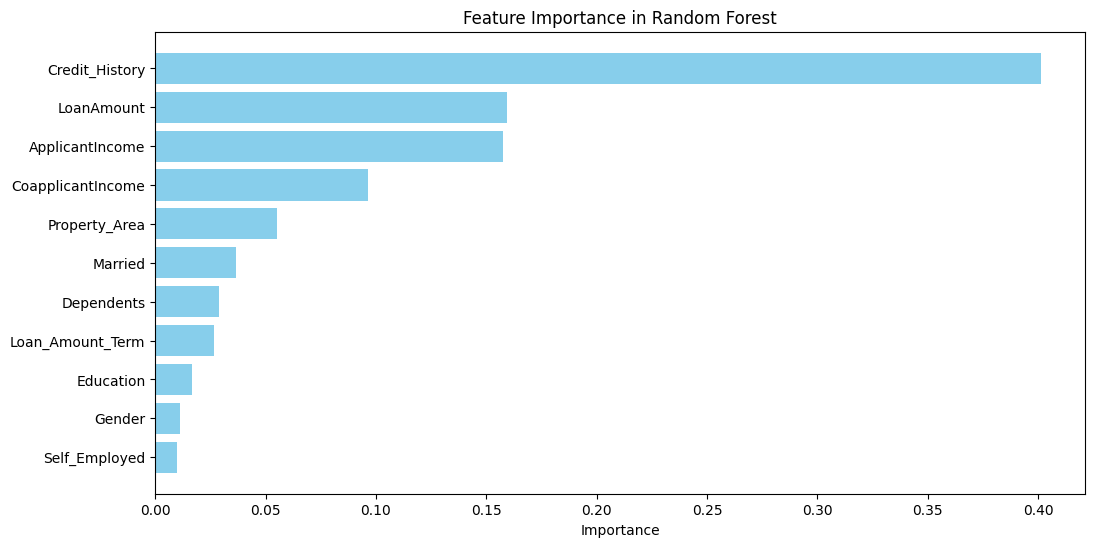

In [ ]:
# Plotting the feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [ ]:
#pred=rf_model.predict(test)
#test_acc=accuracy_score(y_test,pred)

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Scale the data (Gradient Boosting may benefit from scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.87      0.89      0.88        66

    accuracy                           0.83        96
   macro avg       0.81      0.80      0.80        96
weighted avg       0.83      0.83      0.83        96


Confusion Matrix:
 [[21  9]
 [ 7 59]]


In [ ]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier()

# Set up GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best cross-validation score for Gradient Boosting:", grid_search_gb.best_score_)

Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score for Gradient Boosting: 0.8019822282980178


In [ ]:
feature_importances = gb_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

              Feature  Importance
9      Credit_History    0.395309
5     ApplicantIncome    0.214014
7          LoanAmount    0.148872
6   CoapplicantIncome    0.100270
8    Loan_Amount_Term    0.059401
10      Property_Area    0.030196
1             Married    0.020639
2          Dependents    0.016053
0              Gender    0.006787
4       Self_Employed    0.004516
3           Education    0.003942


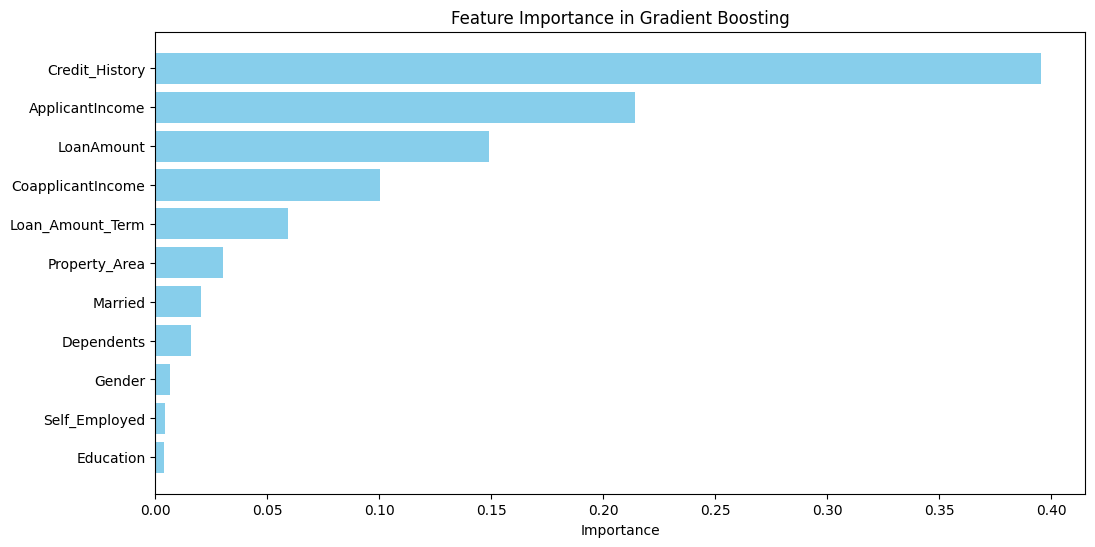

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boosting')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [ ]:
gradient_boosting_best = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    random_state=42  # Ensures reproducibility
)
gradient_boosting_best.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8229166666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.50      0.64        30
           1       0.81      0.97      0.88        66

    accuracy                           0.82        96
   macro avg       0.85      0.73      0.76        96
weighted avg       0.83      0.82      0.81        96


Confusion Matrix:
 [[15 15]
 [ 2 64]]


In [ ]:
feature_importances = gradient_boosting_best.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

              Feature  Importance
9      Credit_History    0.740292
5     ApplicantIncome    0.101175
7          LoanAmount    0.054076
6   CoapplicantIncome    0.044509
1             Married    0.031517
8    Loan_Amount_Term    0.015357
10      Property_Area    0.013075
2          Dependents    0.000000
0              Gender    0.000000
3           Education    0.000000
4       Self_Employed    0.000000


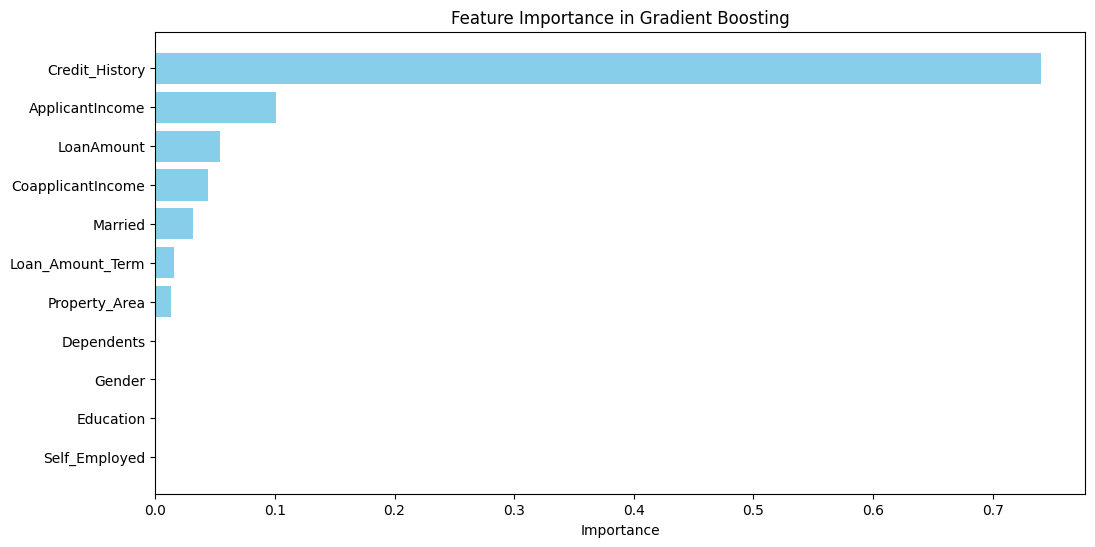

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boosting')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [ ]:
import joblib
joblib.dump(random_forest_best , "model.pkl")
model = joblib.load('model.pkl' )
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1])